In [107]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [126]:

# Download latest version
path = kagglehub.dataset_download("mysarahmadbhat/lung-cancer")

print(path)

# Ver os primeiros dados
df = pd.read_csv(path+"/survey lung cancer.csv")

print(df.head())

/home/mnell/.cache/kagglehub/datasets/mysarahmadbhat/lung-cancer/versions/1
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFI

In [127]:
#tipos presentes na coluna
print(df.dtypes)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [128]:
#analisando se tem elementos nulos no dataframe
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [129]:
#fazendo o etl


genderProvisorio = df['GENDER']

#mudando valores 2 (verdadeiro) para 1 e 1 (falso) para 0
df = df.where(df != 1,0)
df = df.where(df != 2, 1)

#mudando genero 0 para homem e 1 para mulher
df.loc[df['GENDER'] == 'F', 'GENDER'] = 1
df.loc[df['GENDER'] == 'M', 'GENDER'] = 0

#mudando os valores 1 para sim e 0 para não nas outra colunas
df.loc[df['LUNG_CANCER'] == 'YES', 'LUNG_CANCER'] = 1
df.loc[df['LUNG_CANCER'] == 'NO', 'LUNG_CANCER'] = 0

#criando coluna id
df['ID'] = range(len(df))

#normalizando a idade
scaler = StandardScaler()
df['AGE_PAD'] = scaler.fit_transform(df[['AGE']])

print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0   69        0               1        1              0   
1        0   74        1               0        0              0   
2        1   59        0               0        0              1   
3        0   63        1               1        1              0   
4        1   63        0               1        0              0   
..     ...  ...      ...             ...      ...            ...   
304      1   56        0               0        0              1   
305      0   70        1               0        0              0   
306      0   58        1               0        0              0   
307      0   67        1               0        1              0   
308      0   62        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1         1       

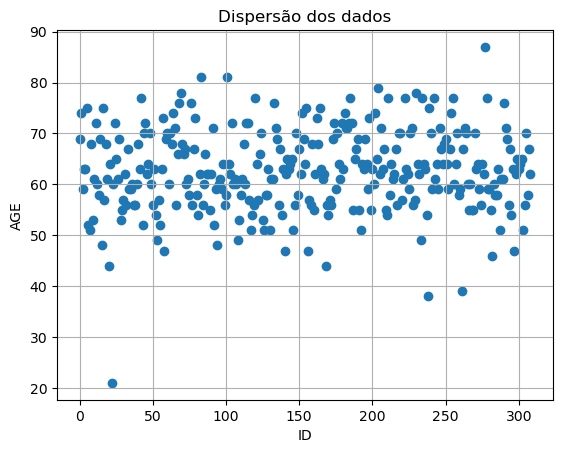

In [130]:
#Plotando grafico
plt.scatter(df['ID'],df['AGE'])
plt.xlabel('ID')
plt.ylabel('AGE')
plt.title('Dispersão dos dados')
plt.grid(True)
plt.show()



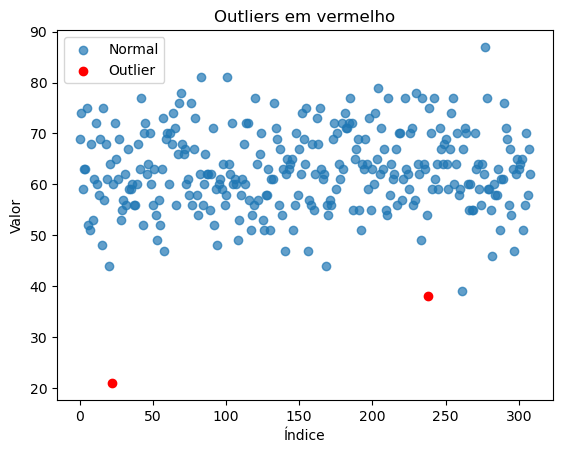

In [131]:
#IDENTIFICNANDO OS OUTLIERS
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = df[(df['AGE'] < limite_inferior) | (df['AGE'] > limite_superior)]
normais = df[(df['AGE'] >= limite_inferior) & (df['AGE'] <= limite_superior)]

# Plotar
plt.scatter(normais.index, normais['AGE'], label='Normal', alpha=0.7)
plt.scatter(outliers.index, outliers['AGE'], color='red', label='Outlier')
plt.title('Outliers em vermelho')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

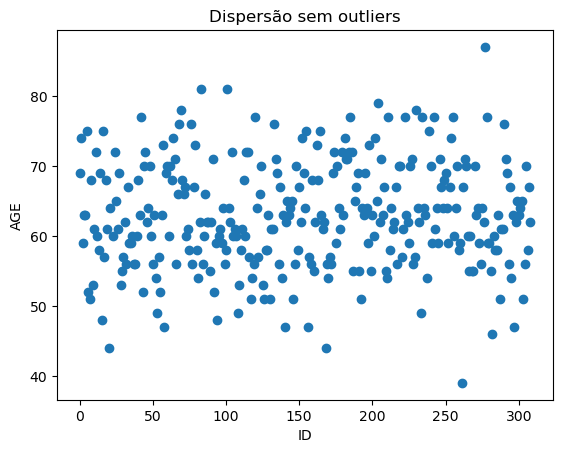

In [132]:
#limpando os outleirs

df = df.drop(outliers.index)

plt.scatter(df['ID'], df['AGE'])
plt.title('Dispersão sem outliers')
plt.xlabel('ID')
plt.ylabel('AGE')
plt.show()

In [133]:
#aprendizagem de maquina

X = df[['SMOKING', 'LUNG_CANCER', 'GENDER', 'AGE', 'CHEST PAIN']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      0   69        0               1        1              0   
1      0   74        1               0        0              0   
2      1   59        0               0        0              1   
3      0   63        1               1        1              0   
4      1   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  ID  \
0                    1                 

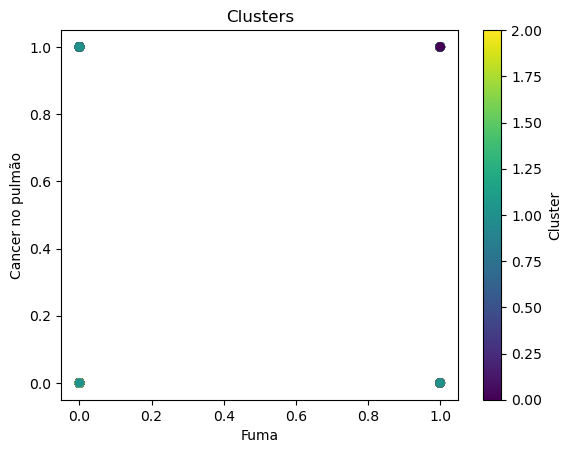

In [134]:
#analisando cluester

plt.scatter(df['SMOKING'], df['ANXIETY'], c=df['cluster'], cmap='viridis')
plt.xlabel('Fuma')
plt.ylabel('Cancer no pulmão')
plt.title('Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [135]:
#analisando os grupos

print(df.groupby('cluster').mean())



           GENDER        AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
cluster                                                            
0        0.470588  71.705882  0.519608        0.539216  0.490196   
1        0.434109  61.604651  0.565891        0.596899  0.558140   
2        0.539474  53.236842  0.618421        0.565789  0.421053   

         PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  \
cluster                                                                 
0             0.500000         0.529412  0.725490  0.578431  0.588235   
1             0.496124         0.426357  0.604651  0.534884  0.542636   
2             0.526316         0.592105  0.710526  0.552632  0.539474   

         ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  \
cluster                                                     
0                 0.578431  0.696078             0.656863   
1                 0.550388  0.550388             0.604651   
2                 0.552632  0.473684             

In [136]:
# Agora, crie um DataFrame com as mesmas colunas para prever:
novo_dado = pd.DataFrame([{
    'SMOKING': 0,
    'LUNG_CANCER': 1,
    'GENDER': 0,
    'AGE': 60,
    'CHEST PAIN': 0,
    
}])

cluster_previsto = kmeans.predict(novo_dado)
print("Esse novo dado pertence ao cluster:", cluster_previsto[0])

Esse novo dado pertence ao cluster: 1


In [172]:

# X = colunas com os dados de entrada
# y = coluna com o rótulo (o que você quer prever)
X = df[['COUGHING', 'PEER_PRESSURE', 'SMOKING', 'CHEST PAIN','FATIGUE ', 'SWALLOWING DIFFICULTY', 'CHRONIC DISEASE', 'AGE_PAD']]

y = df['LUNG_CANCER'].astype(int)

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.9032258064516129


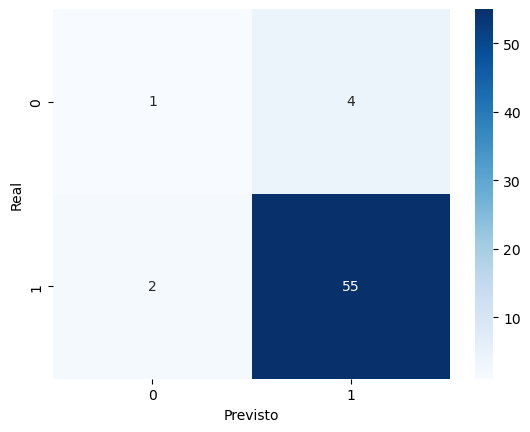

In [173]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [181]:
newDatas = pd.DataFrame([{

    'COUGHING': 0,
    'PEER_PRESSURE': 1,
    'SMOKING':1,
    'CHEST PAIN':0,
    'FATIGUE ': 0,
    'SWALLOWING DIFFICULTY':0,
    'CHRONIC DISEASE': 0,
    'AGE_PAD': 1
    
   
    
}])
#'COUGHING', 'PEER_PRESSURE', 'SMOKING', 'CHEST PAIN','FATIGUE ', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY', 'FATIGUE ', 'CHRONIC DISEASE'
pred = modelo.predict(newDatas)

print('PREVISÂO DE CANCER PULMONAR: ',pred[0])

PREVISÂO DE CANCER PULMONAR:  1
